In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('../data/marketingcampaigns.csv', on_bad_lines='skip')


In [7]:
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.00
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.00


In [8]:
#Examina las primeras filas del dataframe
df.head()


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [9]:
#Examina las últimas filas del dataframe
df.tail()

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.3,social media,B2B,organic,0.5,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.2,50000.0
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.6,webinar,B2B,paid,0.7,90000.0
1031,Too many conversions,2023-05-01,2023-11-01,40000,0.8,social media,B2C,organic,1.5,120000.0


In [10]:
#verifica los tipos de datos de las columnas
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

In [11]:
#Cambiar el tipo de datos de la columna "start_date" a datetime
df["start_date"]=pd.to_datetime(df["start_date"], errors='coerce')
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date                   object
budget                     object
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [12]:
#Cambiar el tipo de datos de la columna "end_date" a datetime
df["end_date"]=pd.to_datetime(df["end_date"], errors='coerce')
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                     object
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [20]:


#Cambiar el tipo de datos de la columna "budget" a float
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df.dtypes


campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [ ]:
#Identificar si hay valores nulos en el dataframe
df.isnull().sum()

campaign_name      0
start_date         3
end_date           3
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [ ]:
#Eliminar las filas que contienen valores nulos
df.dropna(inplace=True)
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [ ]:
#Calcula la media de la columna budget
round(df["budget"].mean(),2)

np.float64(59162.81)

In [ ]:
#Calcula la media de la columna roi
round(df["roi"].mean(),2)

np.float64(0.54)

In [ ]:
#Calcula la media de la columna revenue
round(df["revenue"].mean(),2)

np.float64(514407.15)

In [ ]:
#Calcula la mediana de la columna budget
round(df["budget"].median(),2)

np.float64(47086.38)

In [ ]:
#Calcula la mediana de la columna roi
round(df["roi"].median(),2)

np.float64(0.53)

In [ ]:
#Calcula la mediana de la columna revenue
round(df["revenue"].median(),2) 

np.float64(520400.69)

In [ ]:
#Calcula la moda de la columna type
df["type"].mode()

0    email
Name: type, dtype: object

In [ ]:
#Calcula la moda de la columna target_audience
df["target_audience"].mode()

0    B2B
Name: target_audience, dtype: object

In [ ]:
#calcula la moda de la columna channel
df["channel"].mode()

0    promotion
Name: channel, dtype: object

In [ ]:
#Calcula outliers de la columna budget con el método de los cuartiles
Q1 = df["budget"].quantile(0.25)
Q3 = df["budget"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)  

24735.4925 75016.7825 50281.29


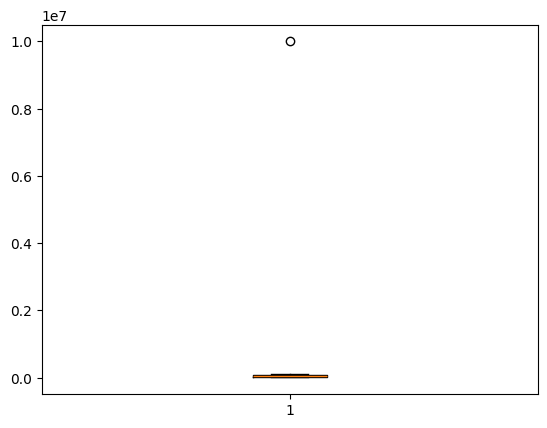

In [ ]:
plt.boxplot(df["budget"])
plt.show()  

In [ ]:
#Calcula outliers de la columna roi con el método de los cuartiles
Q1 = df["roi"].quantile(0.25)
Q3 = df["roi"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

0.31 0.7625 0.45249999999999996


In [ ]:
#Calcula outliers de la columna revenue con el método de los cuartiles
Q1 = df["revenue"].quantile(0.25)
Q3 = df["revenue"].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

269010.415 768851.6975 499841.28250000003


In [ ]:
#Calcula la mediana de la columna budget agrupada por la columna type
df.groupby("type")["budget"].median() 

type
email           46908.410
podcast         48046.330
social media    45070.115
webinar         47906.320
Name: budget, dtype: float64

In [ ]:
#calcula el beneficion neto de cada campaña
df["net_profit"] = df["revenue"] - df["budget"]
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45
...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,0.23,406522.77,312438.56
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47,110421.10
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00,125000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00,30000.00


In [ ]:
#calcula el conversion rate de cada campaña
df["conversion_rate"] = df["revenue"] / df["budget"]
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.795984,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.165567,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.413642,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.165886,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.209189,47511.35,8219.45
...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.320839,406522.77,312438.56
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.724215,174462.47,110421.10
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.666667,200000.00,125000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.500000,90000.00,30000.00


In [ ]:
# Indica que campaña tiene mayor conversion rate
df[df["conversion_rate"] == df["conversion_rate"].max()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
252,Persevering zero administration interface,2023-03-27,2023-10-25,1052.57,0.37,email,B2C,promotion,885.758999,932323.35,931270.78


In [ ]:
#Indica que campaña tiene mayor net profit
df[df["net_profit"] == df["net_profit"].max()]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
492,Advanced systematic complexity,2023-06-10,2024-04-11,1873.52,0.95,podcast,B2C,organic,528.274718,989733.25,987859.73


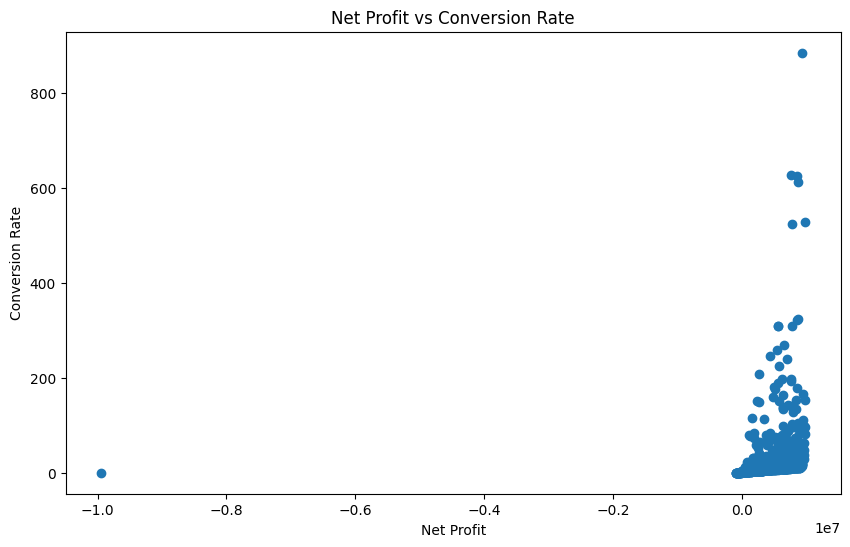

In [ ]:
# Realiza una gráfica donde se muestre el net profit y la conversion rate  por campaña
plt.figure(figsize=(10,6))
plt.scatter(df["net_profit"], df["conversion_rate"])
plt.title("Net Profit vs Conversion Rate")
plt.xlabel("Net Profit") 
plt.ylabel("Conversion Rate")
plt.show()


In [ ]:
#Calcula el z-score de la columna budget
df["z_score_budget"] = (df["budget"] - df["budget"].mean()) / df["budget"].std()
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.795984,709593.48,701511.18,-0.163249
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.165567,516609.10,498896.12,-0.132470
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.413642,458227.42,373584.32,0.081433
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.165886,89958.73,75368.98,-0.142452
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.209189,47511.35,8219.45,-0.063506
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.320839,406522.77,312438.56,0.111606
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.724215,174462.47,110421.10,0.015591
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.666667,200000.00,125000.00,0.050614
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.500000,90000.00,30000.00,0.002676


In [ ]:
#Calcula el z-score de la columna roi
df["z_score_roi"] = (df["roi"] - df["roi"].mean()) / df["roi"].std()   
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget,z_score_roi
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.795984,709593.48,701511.18,-0.163249,-0.709075
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.165567,516609.10,498896.12,-0.132470,0.782885
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.413642,458227.42,373584.32,0.081433,-0.632564
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.165886,89958.73,75368.98,-0.142452,-0.250010
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.209189,47511.35,8219.45,-0.063506,-0.900352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.320839,406522.77,312438.56,0.111606,0.170799
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.724215,174462.47,110421.10,0.015591,-1.435928
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.666667,200000.00,125000.00,0.050614,1.394972
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.500000,90000.00,30000.00,0.002676,0.247310


In [ ]:
#Calcula cuantos valores atípicos hay en la columna budget
df[(df["z_score_budget"] < -3) | (df["z_score_budget"] > 3)].shape[0]  


1

In [ ]:
#Calcula cost_per_conversion de cada campaña   
df["cost_per_conversion"] = round(df["budget"] / df["conversion_rate"],2)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget,z_score_roi,cost_per_conversion
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.795984,709593.48,701511.18,-0.163249,-0.709075,92.06
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.165567,516609.10,498896.12,-0.132470,0.782885,607.33
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.413642,458227.42,373584.32,0.081433,-0.632564,15635.15
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.165886,89958.73,75368.98,-0.142452,-0.250010,2366.21
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.209189,47511.35,8219.45,-0.063506,-0.900352,32494.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.320839,406522.77,312438.56,0.111606,0.170799,21774.52
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.724215,174462.47,110421.10,0.015591,-1.435928,23508.19
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.666667,200000.00,125000.00,0.050614,1.394972,28125.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.500000,90000.00,30000.00,0.002676,0.247310,40000.00


In [ ]:
#muestra todas las columnas numericas a dos decimales
pd.options.display.float_format = '{:.2f}'.format
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget,z_score_roi,cost_per_conversion
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.80,709593.48,701511.18,-0.16,-0.71,92.06
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.17,516609.10,498896.12,-0.13,0.78,607.33
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.41,458227.42,373584.32,0.08,-0.63,15635.15
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.17,89958.73,75368.98,-0.14,-0.25,2366.21
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.21,47511.35,8219.45,-0.06,-0.90,32494.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.32,406522.77,312438.56,0.11,0.17,21774.52
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.72,174462.47,110421.10,0.02,-1.44,23508.19
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.67,200000.00,125000.00,0.05,1.39,28125.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.50,90000.00,30000.00,0.00,0.25,40000.00


In [ ]:
#Ordena el dataframe por la columna cost_per_conversion de forma descendente   
df.sort_values("cost_per_conversion", ascending=False)


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget,z_score_roi,cost_per_conversion
1008,Outlier Budget,2023-07-01,2024-03-01,9999999.00,0.10,email,B2B,promotion,0.01,50000.00,-9949999.00,31.77,-1.67,1999999600.00
889,Grass-roots scalable framework,2023-02-16,2023-08-19,61978.10,0.39,social media,B2C,paid,0.00,108.21,-61869.89,0.01,-0.56,35498427.87
975,Extended 24hour contingency,2023-07-07,2023-08-18,69815.82,0.16,podcast,B2C,organic,0.04,2810.51,-67005.31,0.03,-1.44,1734293.32
710,Horizontal asymmetric contingency,2022-09-16,2024-05-08,99714.19,0.23,email,B2C,referral,0.08,7622.28,-92091.91,0.13,-1.17,1304454.79
330,Persistent radical approach,2022-10-23,2023-08-15,99891.35,0.80,email,B2C,promotion,0.08,8272.50,-91618.85,0.13,1.01,1206199.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Profit-focused actuating open architecture,2023-01-14,2024-03-30,1480.67,0.83,social media,B2C,promotion,525.43,777983.15,776502.48,-0.18,1.13,2.82
361,Automated dedicated budgetary management,2023-08-01,2024-04-06,1436.99,0.14,podcast,B2B,organic,613.62,881768.44,880331.45,-0.18,-1.51,2.34
835,Enhanced optimizing time-frame,2022-11-06,2024-04-02,1378.61,0.15,email,B2B,organic,625.89,862862.99,861484.38,-0.18,-1.47,2.20
887,Synchronized national system engine,2023-01-18,2023-11-11,1223.82,0.71,social media,B2C,paid,628.01,768567.70,767343.88,-0.19,0.67,1.95


In [ ]:
# calcula un flag para identificar si la campaña es rentable o no
df["is_profitable"] = df["net_profit"] > 0
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget,z_score_roi,cost_per_conversion,is_profitable
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.80,709593.48,701511.18,-0.16,-0.71,92.06,True
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.17,516609.10,498896.12,-0.13,0.78,607.33,True
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.41,458227.42,373584.32,0.08,-0.63,15635.15,True
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.17,89958.73,75368.98,-0.14,-0.25,2366.21,True
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.21,47511.35,8219.45,-0.06,-0.90,32494.41,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.32,406522.77,312438.56,0.11,0.17,21774.52,True
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.72,174462.47,110421.10,0.02,-1.44,23508.19,True
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.67,200000.00,125000.00,0.05,1.39,28125.00,True
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.50,90000.00,30000.00,0.00,0.25,40000.00,True


In [ ]:
# Realiza validaciones cruzadas para identificar si la campaña es rentable o no
pd.crosstab(df["is_profitable"], df["type"])   
pd.crosstab(df["is_profitable"], df["channel"])





channel,organic,paid,promotion,referral
is_profitable,,,,
False,4,8,14,16
True,243,233,263,239


In [ ]:
# Quiero guardar el dataframe en un archivo csv en la carpeta data con el nombre marketingcampaigns_clean.csv
df.to_csv('../data/marketingcampaigns_clean.csv', index=False)